# Do logarithmic proximity measures outperform plain ones in graph clustering?

In [1]:
import os
os.environ["OPENBLAS_NUM_THREADS"] = "1"

In [12]:
import sys
import inspect
from collections import defaultdict
from contextlib import contextmanager
from itertools import combinations, product
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook as tqdm
from sklearn.metrics import adjusted_rand_score
from pylab import *

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
sys.path.append('..')
from py_graphs.graphs.generator import StochasticBlockModel
from py_graphs.measure import *
from py_graphs.measure import H_kernels_plus_RSP_FE
from py_graphs.cluster.ward import Ward
from py_graphs.colors import d3, d3_category20
from py_graphs.scenario import *
from py_graphs.scorer import copeland

In [5]:
def load_or_calc_and_save(filename):
    def my_decorator(func):
        def wrapped():
            if os.path.exists(filename):
                print('File exist! Skip calculations')
                with open(filename, 'rb') as f:
                    result = pickle.load(f)
            else:
                result = func()
                with open(filename, 'wb') as f:
                    pickle.dump(result, f)
            return result
        return wrapped
    return my_decorator

In [6]:
def ddict2dict(d):
    for k, v in d.items():
        if isinstance(v, dict):
            d[k] = ddict2dict(v)
    return dict(d)

## 5. Graphs with classes of different sizes

The $G(N,(m)p_{in}, p_{out})$ model generates graphs with nodes divided into classes of the same size. We now consider graphs with $N = 100$ nodes divided into two classes of different sizes. The size of the first class, $N_1$, is shown along the horizontal axis in Fig. 6.

### 5.1 Vary first class

In [7]:
measures_right_order = [
    'pWalk H',
    'Walk H',
    'For H',
    'logFor H',
    'Comm H',
    'logComm H',
    'Heat H',
    'logHeat H',
    'SCT H',
    'SCCT H',
    'RSP K',
    'FE K',    
    'SP-CT H'
]

In [25]:
@load_or_calc_and_save('results/5_2class_2.pkl')
def calc():
    results = defaultdict(lambda: defaultdict(list))
    classic_plot = ParallelByGraphs(adjusted_rand_score, np.linspace(0, 1, 51), progressbar=True)
    for first_class in tqdm([1, 2, 3, 7] + list(range(0, 51, 5))):
        graphs, info = StochasticBlockModel(100, 2, 0.3, 0.1, cluster_sizes=[first_class, 100 - first_class]) \
                                                                                                .generate_graphs(200)
        for measure_class in H_kernels_plus_RSP_FE:
            x, y, error = classic_plot.perform(Ward, measure_class, graphs, 2, n_jobs=12)
            _, best_y = sorted(zip(x, y), key=lambda x: -x[1])[0]
            mean_y = np.mean(y)
            results[measure_class.name][first_class] = (best_y, mean_y)
    return ddict2dict(results)

results = calc()

HBox(children=(IntProgress(value=0, max=15), HTML(value='')))

HBox(children=(IntProgress(value=0, description='pWalk H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Walk H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='For H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='logFor H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Comm H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='logComm H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Heat H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='logHeat H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='SCT H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='SCCT H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='SP-CT H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='RSP K', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='FE K', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='pWalk H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Walk H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='For H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='logFor H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Comm H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='logComm H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Heat H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='logHeat H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='SCT H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='SCCT H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='SP-CT H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='RSP K', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='FE K', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='pWalk H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Walk H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='For H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='logFor H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Comm H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='logComm H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Heat H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='logHeat H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='SCT H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='SCCT H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='SP-CT H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='RSP K', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='FE K', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='pWalk H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Walk H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='For H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='logFor H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Comm H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='logComm H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Heat H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='logHeat H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='SCT H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='SCCT H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='SP-CT H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='RSP K', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='FE K', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='pWalk H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Walk H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='For H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='logFor H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Comm H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='logComm H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Heat H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='logHeat H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='SCT H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='SCCT H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='SP-CT H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='RSP K', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='FE K', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='pWalk H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Walk H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='For H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='logFor H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Comm H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='logComm H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Heat H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='logHeat H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='SCT H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='SCCT H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='SP-CT H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='RSP K', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='FE K', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='pWalk H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Walk H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='For H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='logFor H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Comm H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='logComm H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Heat H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='logHeat H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='SCT H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='SCCT H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='SP-CT H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='RSP K', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='FE K', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='pWalk H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Walk H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='For H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='logFor H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Comm H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='logComm H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Heat H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='logHeat H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='SCT H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='SCCT H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='SP-CT H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='RSP K', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='FE K', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='pWalk H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Walk H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='For H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='logFor H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Comm H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='logComm H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Heat H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='logHeat H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='SCT H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='SCCT H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='SP-CT H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='RSP K', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='FE K', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='pWalk H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Walk H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='For H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='logFor H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Comm H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='logComm H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Heat H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='logHeat H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='SCT H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='SCCT H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='SP-CT H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='RSP K', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='FE K', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='pWalk H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Walk H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='For H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='logFor H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Comm H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='logComm H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Heat H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='logHeat H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='SCT H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='SCCT H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='SP-CT H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='RSP K', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='FE K', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='pWalk H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Walk H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='For H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='logFor H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='logComm H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Heat H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='logHeat H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='SCT H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='SCCT H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='SP-CT H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='RSP K', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='FE K', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='pWalk H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Walk H', max=200), HTML(value='')))

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



HBox(children=(IntProgress(value=0, description='SCCT H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='SP-CT H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='RSP K', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='FE K', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='pWalk H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Walk H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='For H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='logFor H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Comm H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='logComm H', max=200), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Heat H', max=200), HTML(value='')))

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



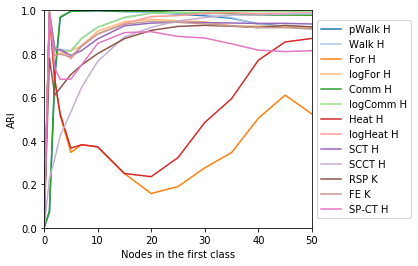

In [31]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

d3c = (x for x in d3_category20)

for measure_name in measures_right_order:
    measure_result = results[measure_name]
    x, y = zip(*sorted([(x, y[0]) for x, y in measure_result.items()], key=lambda x: x[0]))
    ax.plot(x, y, label=measure_name, color=d3c.__next__())

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.set_xlabel('Nodes in the first class')
ax.set_ylabel('ARI')
ax.set_xlim(0, 50)
ax.set_ylim(0, 1)

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.savefig(filename[:-4] + '.png', bbox_inches='tight', dpi=400)
# gcf().suptitle("Fig. 6 Graphs with two classes of different sizes: clustering with optimal parameter values");

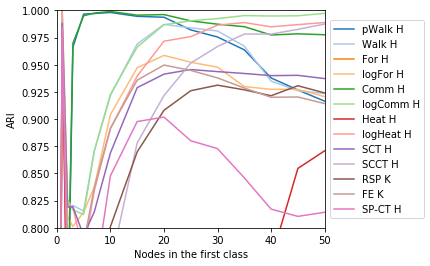

In [32]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

d3c = (x for x in d3_category20)

for measure_name in measures_right_order:
    measure_result = results[measure_name]
    x, y = zip(*sorted([(x, y[0]) for x, y in measure_result.items()], key=lambda x: x[0]))
    ax.plot(x, y, label=measure_name, color=d3c.__next__())

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.set_xlabel('Nodes in the first class')
ax.set_ylabel('ARI')
ax.set_xlim(0, 50)
ax.set_ylim(0.8, 1)

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.savefig(filename[:-4] + '.png', bbox_inches='tight', dpi=400)
# gcf().suptitle("Fig. 6 Graphs with two classes of different sizes: clustering with optimal parameter values");

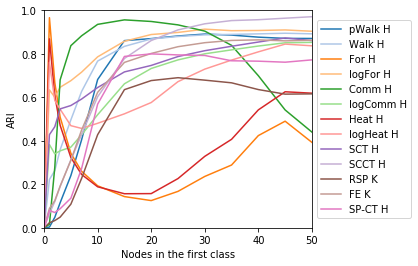

In [33]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

d3c = (x for x in d3_category20)

for measure_name in measures_right_order:
    measure_result = results[measure_name]
    x, y = zip(*sorted([(x, y[1]) for x, y in measure_result.items()], key=lambda x: x[0]))
    ax.plot(x, y, label=measure_name, color=d3c.__next__())

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.set_xlabel('Nodes in the first class')
ax.set_ylabel('ARI')
ax.set_xlim(0, 50)
ax.set_ylim(0, 1)

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.savefig(filename[:-4] + '.png', bbox_inches='tight', dpi=400)
# gcf().suptitle("Fig. 7 Graphs with two classes of different sizes: random parameter values");